<a href="https://colab.research.google.com/github/Ravi007-asd/AA-/blob/Ravi's-branch/DL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
file_path = '/content/sample_data/age_gender.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install kaggle

In [5]:
df = pd.read_csv('/content/sample_data/age_gender.csv')

In [6]:
df.shape

(23705, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [8]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [9]:
df.isna().sum()

,0
age,0
ethnicity,0
gender,0
img_name,0
pixels,0


In [10]:
df.sample(5)

,age,ethnicity,gender,img_name,pixels
11345,30,1,1,20170112204445843.jpg.chip.jpg,26 19 13 25 40 53 66 77 90 93 94 95 104 113 11...
9100,28,2,1,20170104020633108.jpg.chip.jpg,9 6 11 12 30 65 82 37 47 16 27 26 32 74 141 16...
9325,28,1,0,20170113185214520.jpg.chip.jpg,187 98 80 76 71 60 60 63 69 70 71 70 67 67 69 ...
22869,8,0,1,20170109203433105.jpg.chip.jpg,151 141 131 132 155 145 155 147 153 149 148 13...
12194,32,2,0,20170116191438103.jpg.chip.jpg,22 13 21 34 39 92 168 182 179 175 173 171 173 ...


In [11]:
df.drop('img_name',axis=1,inplace=True)

In [12]:
df.ethnicity.value_counts()

,count
ethnicity,
0,10078
1,4526
3,3975
2,3434
4,1692


In [13]:
df.gender.value_counts()

,count
gender,
0,12391
1,11314


<Axes: xlabel='age', ylabel='Count'>

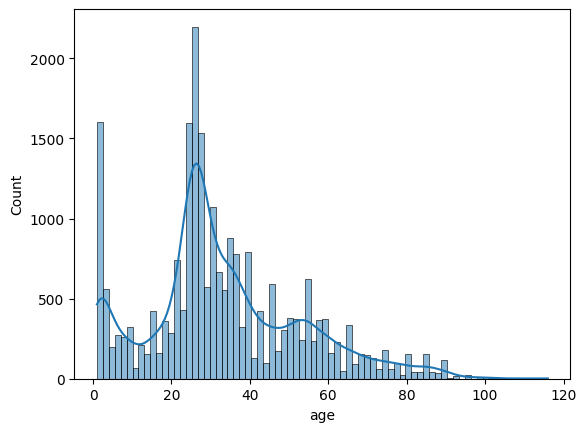

In [14]:
sns.histplot(data=df,x='age',kde=True)

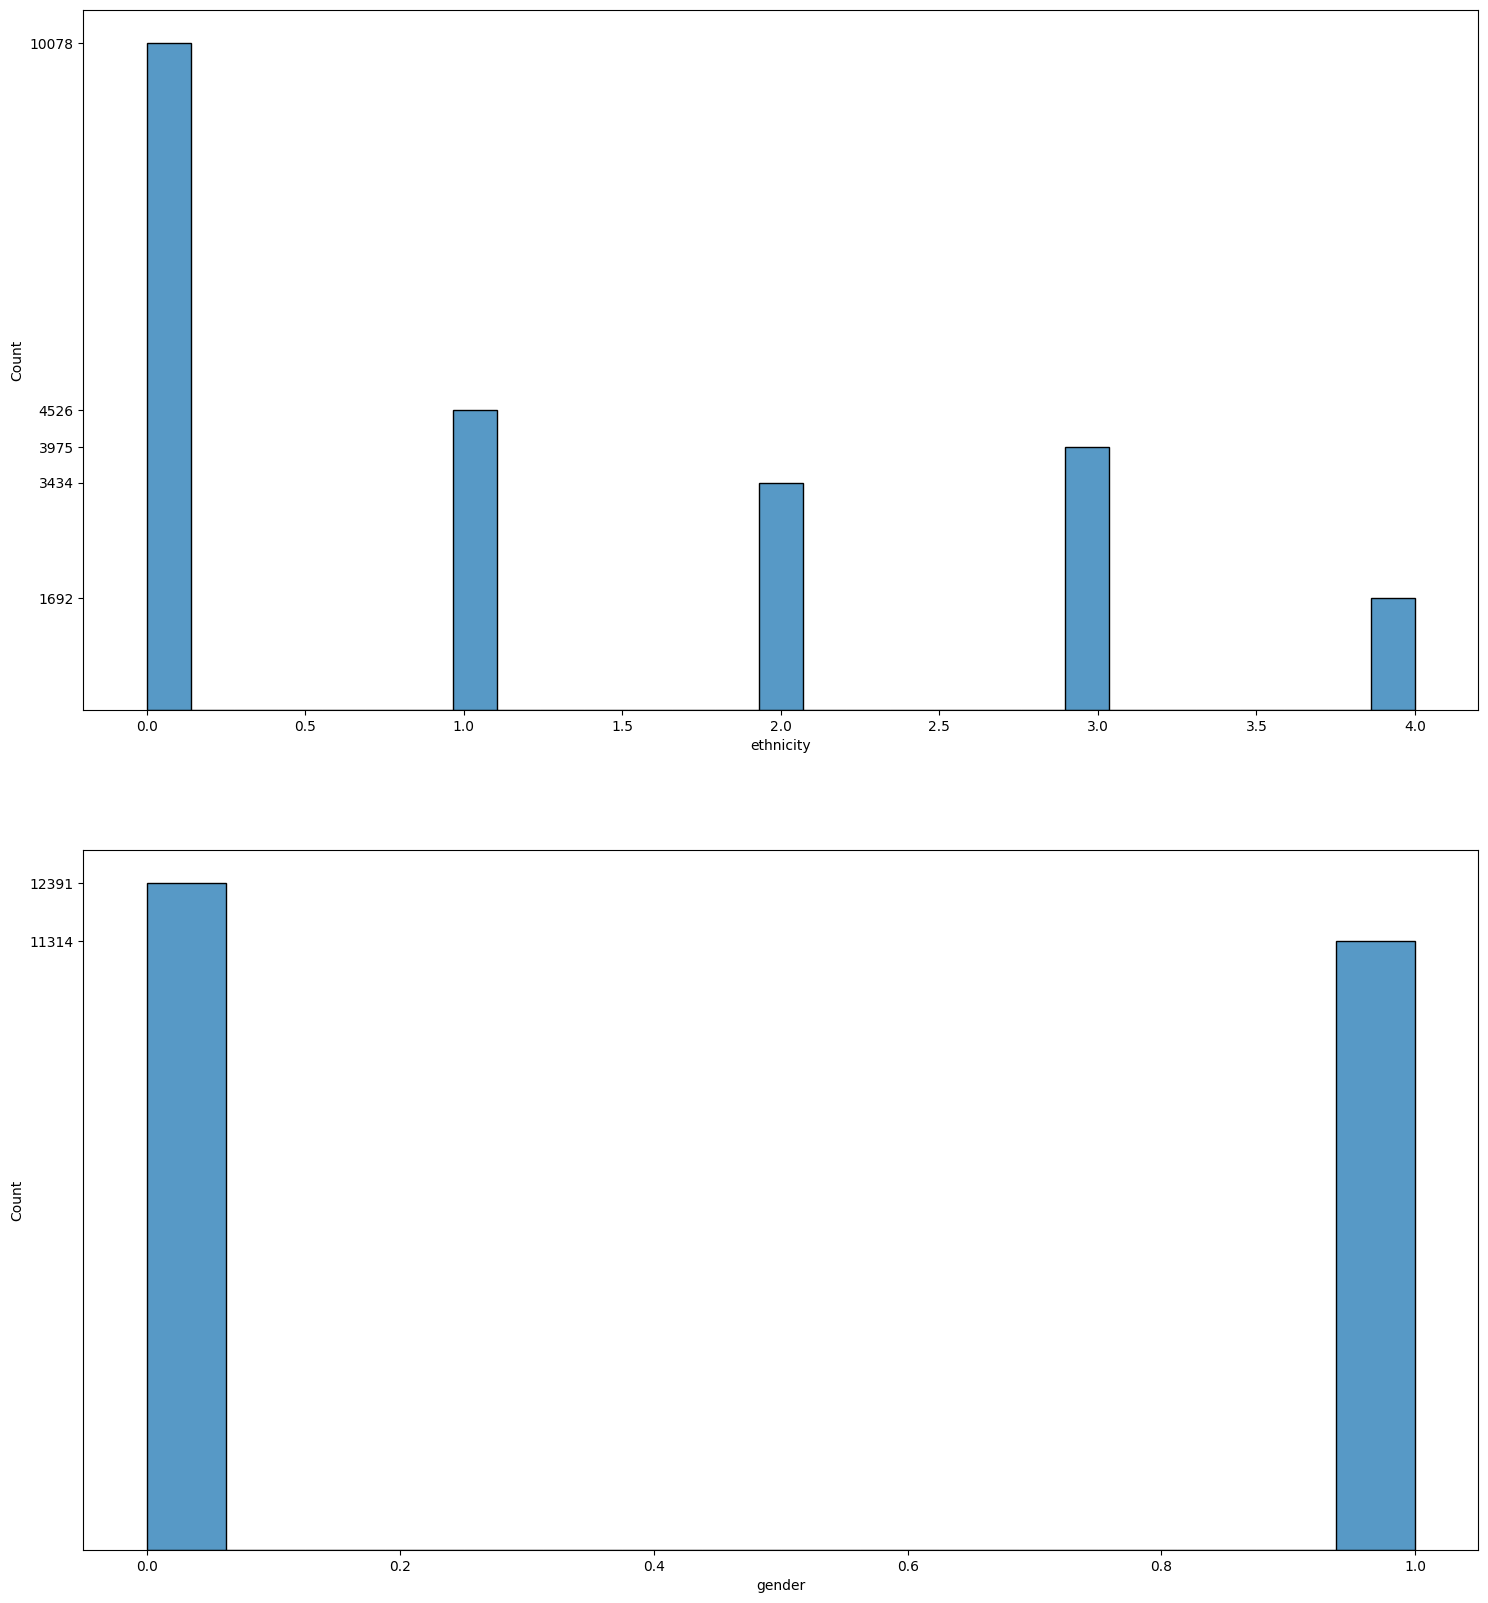

In [15]:
categoricals=['ethnicity','gender']
fig,axes=plt.subplots(2,1,figsize=(18,20))
for i, col in enumerate(categoricals):
    sns.histplot(data=df,x=col,ax=axes[i])
    axes[i].set_yticks(df[col].value_counts())
plt.show()

In [16]:
len(df.pixels[0].split(' '))

2304

In [17]:
np.sqrt(2304)

48.0

In [18]:
NUM_PIXELS=2304
IMG_HEIGHT=48
IMG_WIDTH=48

In [19]:
df['age'] = pd.qcut(df['age'], q=4, labels=[0, 1, 2, 3])

In [20]:
df.age.value_counts()

,count
age,
2,6157
0,6044
1,5893
3,5611


In [21]:
y=df[['ethnicity','gender','age']]

In [22]:
y

,ethnicity,gender,age
0,2,0,0
1,2,0,0
2,2,0,0
3,2,0,0
4,2,0,0
...,...,...,...
23700,0,1,3
23701,1,1,3
23702,2,1,3
23703,2,1,3


In [23]:
X=df.drop(columns=['ethnicity','gender','age'],axis=1)

In [24]:
X

,pixels
0,129 128 128 126 127 130 133 135 139 142 145 14...
1,164 74 111 168 169 171 175 182 184 188 193 199...
2,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,193 197 198 200 199 200 202 203 204 205 208 21...
4,202 205 209 210 209 209 210 211 212 214 218 21...
...,...
23700,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,45 108 120 156 206 197 140 180 191 199 204 207...


In [25]:
X = pd.Series(X['pixels'])
X = X.apply(lambda x: x.split(' '))
X = X.apply(lambda x: np.array(list(map(lambda z: int(z), x))))
X = np.array(X)
X = np.stack(np.array(X), axis=0)
X = np.reshape(X, (-1, 48, 48))

X.shape

(23705, 48, 48)

In [26]:
X

array([[[129, 128, 128, ..., 118,  99,  53],
        [130, 129, 128, ..., 117,  98,  52],
        [131, 129, 130, ..., 114,  97,  50],
        ...,
        [121, 138, 147, ..., 151, 150, 148],
        [117, 137, 146, ..., 149, 148, 148],
        [115, 135, 142, ..., 146, 146, 146]],

       [[164,  74, 111, ..., 111, 111, 104],
        [179,  70, 128, ..., 112, 113, 108],
        [176,  71, 146, ..., 112, 112, 109],
        ...,
        [192, 196, 235, ..., 111, 124, 112],
        [230, 226, 233, ..., 198, 197, 180],
        [238, 239, 233, ..., 182, 170, 148]],

       [[ 67,  70,  71, ..., 197, 194, 192],
        [ 65,  66,  69, ..., 197, 194, 192],
        [ 61,  63,  69, ..., 197, 194, 190],
        ...,
        [159, 157, 159, ..., 114, 105, 105],
        [102, 114, 110, ..., 114, 110, 107],
        [ 98,  97,  95, ..., 112, 111, 108]],

       ...,

       [[ 59,  50,  37, ..., 119, 113,  98],
        [ 56,  48,  44, ..., 111, 115,  97],
        [ 40,  32,  26, ..., 108, 117, 101

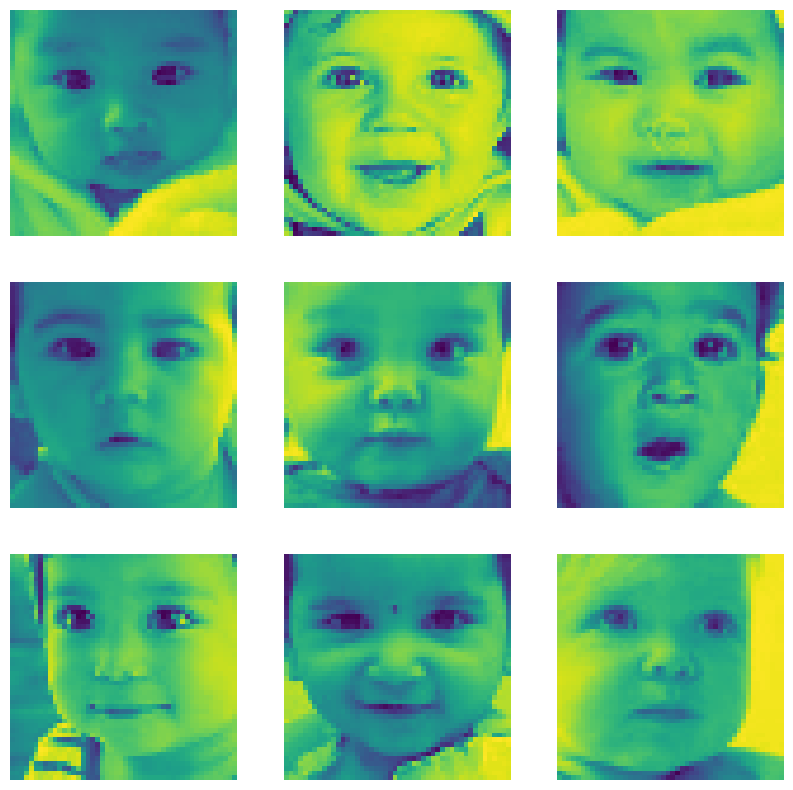

In [27]:
plt.figure(figsize=(10, 10))
for index,image in enumerate(np.random.randint(0, 1000, 9)):
    plt.subplot(3,3,index+1)
    plt.imshow(X[image])
    plt.axis('off')

plt.show()

In [28]:
y_gender =np.array(y['gender'])
y_ethnicity =np.array(y['ethnicity'])
y_age = np.array(y['age'])

In [29]:
y_gender.shape

(23705,)

In [30]:
X.max()

255

In [31]:
X=X/255.0

In [32]:
X.max()

1.0

In [33]:
X.min()

0.0

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Reshape input data (add channel dimension for grayscale)
X = X.reshape(-1, 48, 48, 1)

# One-hot encode the labels
y_gender = to_categorical(y_gender, num_classes=4)

# Create the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps into a vector
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Prevent overfitting

# Output layer
model.add(Dense(4, activation='softmax'))  # 4 classes

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 838,660 (3.20 MB)

 Trainable params: 838,660 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_gender,train_size=0.7)

In [36]:
X_train.shape,y_train.shape

((16593, 48, 48, 1), (16593, 4))

In [37]:
X_test.shape,y_test.shape

((7112, 48, 48, 1), (7112, 4))

In [46]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=65, verbose=1)

Epoch 1/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9149 - loss: 0.1956 - val_accuracy: 0.9235 - val_loss: 0.1938
Epoch 2/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9226 - loss: 0.1850 - val_accuracy: 0.9223 - val_loss: 0.1927
Epoch 3/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9269 - loss: 0.1790 - val_accuracy: 0.9223 - val_loss: 0.1887
Epoch 4/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9344 - loss: 0.1635 - val_accuracy: 0.9223 - val_loss: 0.1862
Epoch 5/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9367 - loss: 0.1524 - val_accuracy: 0.9271 - val_loss: 0.1933
Epoch 6/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9417 - loss: 0.1476 - val_accuracy: 0.9211 - val_loss: 0.1918
Epoch 7/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9488 - loss: 0.1310 - val_accuracy: 0.9169 - val_loss: 0.2172
Epoch 8/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9504 - loss: 0.1278 - val_ac

In [47]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")

223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9147 - loss: 1.0761
Test Accuracy: 0.9104330539703369


# FROM HERE ON ITS JUST  **ME DOING RANDOM SHIT**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Reshape input data (add channel dimension for grayscale)
X = X.reshape(-1, 48, 48, 1)

# One-hot encode the labels (Fix: Gender is binary, so num_classes=2)
y_gender = to_categorical(y['gender'], num_classes=2)

# Data Augmentation (New)
data_gen = ImageDataGenerator(
    rotation_range=20,    # Rotate images by 20 degrees
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,  # Flip images horizontally
    zoom_range=0.2
)

# Updated Model Architecture
model = Sequential()

# First convolutional block
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())  # Added Batch Normalization
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block (New)
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))  # Increased neurons (was 128)
model.add(Dropout(0.5))  # Keeping dropout

model.add(Dense(128, activation='relu'))  # Added another dense layer
model.add(Dropout(0.3))  # Increased dropout for better generalization

# Output Layer
model.add(Dense(2, activation='softmax'))  # Output layer for gender classification

# Compile the model with Adam optimizer and learning rate scheduler
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Learning Rate Scheduler (New)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Summary of the model
model.summary()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_gender, train_size=0.7, random_state=42)

# Ensure labels have the correct shape
y_train = np.array(y_train).reshape(-1, 2)
y_test = np.array(y_test).reshape(-1, 2)

# Train the model with augmented data
history = model.fit(
    data_gen.flow(X_train, y_train, batch_size=64),  # Apply augmentation
    validation_data=(X_test, y_test),
    epochs=100,
    callbacks=[lr_scheduler],  # Apply learning rate scheduler
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 21, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 651,266 (2.48 MB)

 Trainable params: 650,818 (2.48 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.5640 - loss: 0.9662 - val_accuracy: 0.5260 - val_loss: 0.9373 - learning_rate: 0.0010
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.6347 - loss: 0.6505 - val_accuracy: 0.7191 - val_loss: 0.5919 - learning_rate: 0.0010
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7124 - loss: 0.5674 - val_accuracy: 0.6786 - val_loss: 0.5589 - learning_rate: 0.0010
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.7659 - loss: 0.4993 - val_accuracy: 0.7050 - val_loss: 0.5488 - learning_rate: 0.0010
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.7859 - loss: 0.4573 - val_accuracy: 0.7677 - val_loss: 0.4632 - learning_rate: 0.0010
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.8011 - loss: 0.4255 - val_accuracy: 0.7899 - val_loss: 0.4659 - learning_rate: 0.0010
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.8174 - 

# NEXT LEVEL TIME WASTE

In [ ]:
import os
print(os.listdir())  # List files in the current directory


In [ ]:
from google.colab import files
files.download("gender_classification_model.h5")

In [ ]:
from google.colab import files
uploaded = files.upload()  # This will allow you to select and upload a file


In [ ]:
import os
print(os.listdir())  # Should now include "your_model.h5"



In [ ]:
import tensorflow as tf
from tensorflow import keras

# Create a simple model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(28, 28)),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Save the model
model.save('gender_classification_model.keras')



In [ ]:
model = tf.keras.models.load_model("gender_classification_model.keras")
print("Model loaded successfully!")


# qwertyuiop

In [ ]:
!pip install gradio  # Install Gradio

import gradio as gr
import tensorflow as tf  # Example ML model
import numpy as np

# Load a pre-trained model (replace with your own)
model = tf.keras.models.load_model("gender_classification_model.keras") # Changed filename

# Define the prediction function
def predict(image):
    # Resize the image to the desired shape (28, 28)
    image = tf.image.resize(image, [28, 28])
    # Convert the image to grayscale by averaging the color channels
    image = tf.image.rgb_to_grayscale(image)
    # Add a batch dimension
    image = tf.expand_dims(image, axis=0)
    # Make prediction
    prediction = model.predict(image)
    # Get the class with the highest probability
    return np.argmax(prediction)

# Create a simple interface
iface = gr.Interface(
    fn=predict,
    inputs=gr.Image(image_mode="L"),  # Adjust for your use case
    outputs="label"
)

iface.launch(share=True)  # Generates a public URL